# My fuck around and find out playground

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import os
import pandas as pd
from transformers import BertTokenizer, BertModel
import gensim.downloader as api
import gensim

In [9]:
connections_data_file = "./NYT-Connections-Answers/connections.json"

df = pd.read_json(connections_data_file)['answers']

In [10]:
path = api.load("word2vec-google-news-300", return_path=True)

In [11]:
model = gensim.models.keyedvectors.load_word2vec_format(path, binary=True)

In [12]:
import sklearn

In [13]:
for i in df[0]:
    print(i)

{'level': 0, 'group': 'WET WEATHER', 'members': ['HAIL', 'RAIN', 'SLEET', 'SNOW']}
{'level': 1, 'group': 'NBA TEAMS', 'members': ['BUCKS', 'HEAT', 'JAZZ', 'NETS']}
{'level': 2, 'group': 'KEYBOARD KEYS', 'members': ['OPTION', 'RETURN', 'SHIFT', 'TAB']}
{'level': 3, 'group': 'PALINDROMES', 'members': ['KAYAK', 'LEVEL', 'MOM', 'RACECAR']}


In [14]:
def utility(row):
    out = []
    for level in row:
        out.append(
            [member.lower() for member in level['members']]
        )
    
    return out

In [15]:
df = df.apply(lambda x: utility(x))

In [16]:
flat = [x for row in df[0] for x in row]

In [17]:
flat

['hail',
 'rain',
 'sleet',
 'snow',
 'bucks',
 'heat',
 'jazz',
 'nets',
 'option',
 'return',
 'shift',
 'tab',
 'kayak',
 'level',
 'mom',
 'racecar']

In [18]:
from sklearn.cluster import KMeans

In [19]:
import numpy as np

In [20]:
def get_vector_dict(words: list[str]):
    out = {}
    for word in words:
        vector = model.get_vector(word)
        out[vector] = word
    return out

In [21]:
def get_vectors(words: list[str], model):
    lst_of_vecs = []
    for word in words:
        lst_of_vecs.append(model.get_vector(word, norm=True))
    return np.array(lst_of_vecs)

In [22]:
kmeans = KMeans(n_clusters=4).fit_predict(get_vectors(flat ,model))

In [23]:
from k_means_constrained import KMeansConstrained

In [24]:
kmeans_const = KMeansConstrained(
    n_clusters=4,
    size_min=4,
    size_max=4,
    random_state=0
)

In [25]:
kmeans

array([1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 3, 0, 2, 3], dtype=int32)

In [26]:
actual = [[i]*4 for i in range(4)]
actual = [x for row in actual for x in row]

In [27]:
actual

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]

In [28]:
import numpy as np

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [30]:
cmatrix = confusion_matrix(actual, kmeans)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(kmeans, actual)

0.375

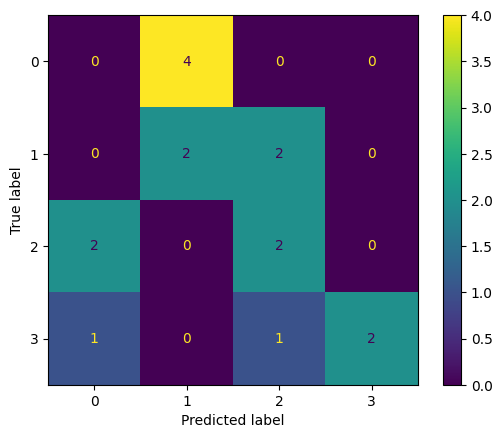

In [33]:
ConfusionMatrixDisplay(confusion_matrix=cmatrix).plot()

In [34]:
from itertools import permutations

In [35]:
list(permutations([0,1,2,3]))

[(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 2, 3, 0),
 (1, 3, 0, 2),
 (1, 3, 2, 0),
 (2, 0, 1, 3),
 (2, 0, 3, 1),
 (2, 1, 0, 3),
 (2, 1, 3, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 0, 2, 1),
 (3, 1, 0, 2),
 (3, 1, 2, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0)]